Questão 5:
Considere o preço diário do Bitcoin disponível na coluna “PriceUSD” da tabela
“https://coinmetrics.io/newdata/btc.csv".
Faça um algoritmo (python, R , Excel...) bem simples (média movel, regressão linear,etc..) para prever
o preço do dia seguinte. Compartilhe o código, brevemente explique o seu funcionamento e apresente
alguns resultados.

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [78]:
url = "https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv" 

raw_data = pd.read_csv(url, low_memory=False)

In [79]:
raw_data.tail()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
5348,2023-08-26,917123.0,8922.0,3014680.0,19932741.0,976.0,554670.0,9294610.0,42.0,101223.0,...,2.173399e+09,0.120193,3125.757747,0.000125,3.250772,12.240698,0.022962,0.016079,26049.39,coinbase-btc-usd-spot
5349,2023-08-27,808508.0,8915.0,3015481.0,19945932.0,977.0,554561.0,9298729.0,42.0,101239.0,...,1.702761e+09,0.118756,3097.919456,0.000382,9.976207,12.138561,0.022931,0.016066,26009.61,coinbase-btc-usd-spot
5350,2023-08-28,873786.0,8915.0,3016624.0,19939250.0,977.0,554769.0,9299153.0,42.0,101246.0,...,3.688900e+09,0.265649,6934.321540,0.001489,38.868040,12.080963,0.022886,0.016057,26091.16,coinbase-btc-usd-spot
5351,2023-08-29,1060996.0,8907.0,3017742.0,19944065.0,976.0,554943.0,9308002.0,42.0,101288.0,...,4.792835e+09,0.286136,7918.026253,0.000641,17.728209,11.947172,0.023282,0.019678,26101.04,coinbase-btc-usd-spot
5352,2023-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27717.98,coinbase-btc-usd-spot


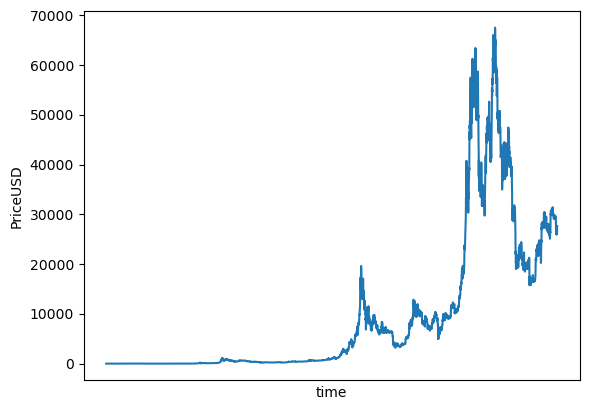

In [80]:
sns.lineplot(x='time', y='PriceUSD',data=raw_data)
plt.xticks([])
plt.show()

Como obviamente não existe uma relação linear entre time e PriceUSD, decidi utilizar uma abordagem um pouco mais sofisticada.
A ideia é prever o valor do Bitcoin no dia seguinte utilizando como base as métricas do dia atual utilizando uma regressão linear com múltiplas variáveis. Para isso, adicionei uma nova coluna chamada "next_day_PriceUSD". Dessa maneira, cada linha contém as métricas do dia atual e a "variável dependente" que é
o valor do bitcoin do dia seguinte. Estou assumindo com isso que sabendo o estado do mercado no dia atual tenho informação suficiente para prever o valor do bitcoin no dia seguinte.

In [81]:
# adiciona uma nova coluna 'next_day_PriceUSD' que corresponde ao valor de PriceUSD no dia seguinte. 

pre_target=raw_data[['PriceUSD']].copy()
target=np.roll(pre_target,-1) # desloca os valores 1 linha para cima
df=raw_data.copy()
df['next_day_PriceUSD']=target

In [82]:
df.tail()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd,next_day_PriceUSD
5348,2023-08-26,917123.0,8922.0,3014680.0,19932741.0,976.0,554670.0,9294610.0,42.0,101223.0,...,0.120193,3125.757747,0.000125,3.250772,12.240698,0.022962,0.016079,26049.39,coinbase-btc-usd-spot,26086.361259
5349,2023-08-27,808508.0,8915.0,3015481.0,19945932.0,977.0,554561.0,9298729.0,42.0,101239.0,...,0.118756,3097.919456,0.000382,9.976207,12.138561,0.022931,0.016066,26009.61,coinbase-btc-usd-spot,26103.276573
5350,2023-08-28,873786.0,8915.0,3016624.0,19939250.0,977.0,554769.0,9299153.0,42.0,101246.0,...,0.265649,6934.321540,0.001489,38.868040,12.080963,0.022886,0.016057,26091.16,coinbase-btc-usd-spot,27672.222131
5351,2023-08-29,1060996.0,8907.0,3017742.0,19944065.0,976.0,554943.0,9308002.0,42.0,101288.0,...,0.286136,7918.026253,0.000641,17.728209,11.947172,0.023282,0.019678,26101.04,coinbase-btc-usd-spot,NaN
5352,2023-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27717.98,coinbase-btc-usd-spot,NaN


In [83]:
df[['PriceUSD']].tail()

,PriceUSD
5348,26006.174080
5349,26086.361259
5350,26103.276573
5351,27672.222131
5352,NaN


A última linha é desnecessária e será removida. A penúltima linha corresponde aos dados do dia atual, a última coluna desta representa o valor do bitcoin a ser descoberto; portanto, essa linha será posteriormente descolada do dataframe principal para se tornar os dados de entrada que serão usados para prever o valor do bitcoin no dia seguinte, uma vez que o modelo de regressão linear estiver treinado. 

In [84]:
# gera uma lista das colunas que possuem correlação com "next_day_PriceUSD" maior ou igual a 0.95. 

cor_df=df.corr(numeric_only=True)[['next_day_PriceUSD']]

selected_features=[]

for index in cor_df.index:
    if abs(cor_df.loc[index,'next_day_PriceUSD'])>=0.95:
        selected_features.append(index)

In [85]:
len(selected_features)

19

In [86]:
selected_features

['AdrBalUSD100KCnt',
 'AdrBalUSD10KCnt',
 'AdrBalUSD10MCnt',
 'AdrBalUSD1MCnt',
 'CapAct1yrUSD',
 'CapMrktCurUSD',
 'CapMrktEstUSD',
 'CapMrktFFUSD',
 'IssContUSD',
 'IssTotUSD',
 'PriceUSD',
 'ReferenceRate',
 'ReferenceRateEUR',
 'ReferenceRateUSD',
 'RevUSD',
 'SplyMiner0HopAllUSD',
 'SplyMiner1HopAllUSD',
 'principal_market_price_usd',
 'next_day_PriceUSD']

Por uma questão de simplicidade, selecionei as colunas que vou utilizar no modelo de forma grosseira. Esse método não é nem de longe o ideal, pois eliminei colunas categóricas e descartei qualquer parâmetro que não tivesse uma correlação **linear** com a variável target.

In [87]:
filtered_df=df.loc[:,df.columns.isin(selected_features)]

In [88]:
df_final=filtered_df.iloc[:-2,:] # este dataframe contém somente as linhas que vou usar para treinar o modelo de RL
entrada=filtered_df.iloc[-2,:] # esta série contém as métricas de hoje, que serão usadas como input do modelo para prever o preço de amanhã

In [89]:
df_final.tail()

,AdrBalUSD100KCnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1MCnt,CapAct1yrUSD,CapMrktCurUSD,CapMrktEstUSD,CapMrktFFUSD,IssContUSD,IssTotUSD,PriceUSD,ReferenceRate,ReferenceRateEUR,ReferenceRateUSD,RevUSD,SplyMiner0HopAllUSD,SplyMiner1HopAllUSD,principal_market_price_usd,next_day_PriceUSD
5346,319788.0,1984350.0,5274.0,70619.0,1.595197e+11,5.086051e+11,5.085863e+11,3.588522e+11,2.269765e+07,2.269765e+07,26126.794333,26452.193588,24372.107810,26452.193588,2.315689e+07,4.733515e+10,6.652286e+10,26427.54,26040.881255
5347,319327.0,1982216.0,5270.0,70567.0,1.589561e+11,5.069546e+11,5.069372e+11,3.574480e+11,2.197199e+07,2.197199e+07,26040.881255,26126.794333,24193.931908,26126.794333,2.244327e+07,4.718130e+10,6.623914e+10,26163.49,26006.174080
5348,319056.0,1981418.0,5267.0,70505.0,1.587016e+11,5.063012e+11,5.062832e+11,3.568373e+11,2.226779e+07,2.226779e+07,26006.174080,26040.881255,24138.281865,26040.881255,2.268177e+07,4.708154e+10,6.616842e+10,26049.39,26086.361259
5349,319581.0,1984861.0,5275.0,70594.0,1.591365e+11,5.078812e+11,5.078666e+11,3.576753e+11,1.891261e+07,1.891261e+07,26086.361259,26006.174080,24114.005681,26006.174080,1.926157e+07,4.722673e+10,6.633099e+10,26009.61,26103.276573
5350,319776.0,1986071.0,5277.0,70589.0,1.592662e+11,5.082298e+11,5.082153e+11,3.578094e+11,1.925117e+07,1.925117e+07,26103.276573,26086.361259,24179.332654,26086.361259,1.969516e+07,4.725842e+10,6.638516e+10,26091.16,27672.222131


In [90]:
entrada

AdrBalUSD100KCnt              3.295020e+05
AdrBalUSD10KCnt               2.045796e+06
AdrBalUSD10MCnt               5.422000e+03
AdrBalUSD1MCnt                7.199900e+04
CapAct1yrUSD                  1.691822e+11
CapMrktCurUSD                 5.388044e+11
CapMrktEstUSD                 5.387816e+11
CapMrktFFUSD                  3.788903e+11
IssContUSD                    2.732632e+07
IssTotUSD                     2.732632e+07
PriceUSD                      2.767222e+04
ReferenceRate                 2.610328e+04
ReferenceRateEUR              2.409661e+04
ReferenceRateUSD              2.610328e+04
RevUSD                        2.792009e+07
SplyMiner0HopAllUSD           5.005870e+10
SplyMiner1HopAllUSD           7.021305e+10
principal_market_price_usd    2.610104e+04
next_day_PriceUSD                      NaN
Name: 5351, dtype: float64

In [91]:
for column in df_final.columns:
    nans=df_final[[column]].isna().sum()
    print(f'Column {column}: {nans}')

Column AdrBalUSD100KCnt: AdrBalUSD100KCnt    561
dtype: int64
Column AdrBalUSD10KCnt: AdrBalUSD10KCnt    561
dtype: int64
Column AdrBalUSD10MCnt: AdrBalUSD10MCnt    561
dtype: int64
Column AdrBalUSD1MCnt: AdrBalUSD1MCnt    561
dtype: int64
Column CapAct1yrUSD: CapAct1yrUSD    561
dtype: int64
Column CapMrktCurUSD: CapMrktCurUSD    561
dtype: int64
Column CapMrktEstUSD: CapMrktEstUSD    3822
dtype: int64
Column CapMrktFFUSD: CapMrktFFUSD    561
dtype: int64
Column IssContUSD: IssContUSD    561
dtype: int64
Column IssTotUSD: IssTotUSD    561
dtype: int64
Column PriceUSD: PriceUSD    561
dtype: int64
Column ReferenceRate: ReferenceRate    562
dtype: int64
Column ReferenceRateEUR: ReferenceRateEUR    968
dtype: int64
Column ReferenceRateUSD: ReferenceRateUSD    562
dtype: int64
Column RevUSD: RevUSD    561
dtype: int64
Column SplyMiner0HopAllUSD: SplyMiner0HopAllUSD    561
dtype: int64
Column SplyMiner1HopAllUSD: SplyMiner1HopAllUSD    561
dtype: int64
Column principal_market_price_usd: pr

Com base nas informações acima, decidi remover todas as colunas que possuiam mais de 700 NaNs. Em seguida, removi todas as linhas que possuiam algum NaN. Essa foi uma maneira rudimentar que utilizei para lidar com os NaNs por uma questão de simplicidade. Cerca de 560 linhas foram perdidas nesse processo; se fosse uma situação real, o correto seria tentar mitigar a perda de dados através da substituição de certos NaNs por valores estratégicos, como média, mediana, média móvel, média entre os valores anterior e posterior etc. 

In [92]:
selected_features2=[]

for column in df_final.columns:
    nans=df_final[[column]].isna().sum()[0]
    if nans<700: # mantém somente colunas com menos de 700 NaNs
        selected_features2.append(column)
    
df_final_2=df_final.loc[:,df_final.columns.isin(selected_features2)].copy() #mantém só as colunas selecionadas
entrada_final=entrada.loc[selected_features2].copy() # mantém só as colunas selecionadas
entrada_final.drop(index='next_day_PriceUSD',inplace=True) 

In [93]:
df_final_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351 entries, 0 to 5350
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AdrBalUSD100KCnt     4790 non-null   float64
 1   AdrBalUSD10KCnt      4790 non-null   float64
 2   AdrBalUSD10MCnt      4790 non-null   float64
 3   AdrBalUSD1MCnt       4790 non-null   float64
 4   CapAct1yrUSD         4790 non-null   float64
 5   CapMrktCurUSD        4790 non-null   float64
 6   CapMrktFFUSD         4790 non-null   float64
 7   IssContUSD           4790 non-null   float64
 8   IssTotUSD            4790 non-null   float64
 9   PriceUSD             4790 non-null   float64
 10  ReferenceRate        4789 non-null   float64
 11  ReferenceRateUSD     4789 non-null   float64
 12  RevUSD               4790 non-null   float64
 13  SplyMiner0HopAllUSD  4790 non-null   float64
 14  SplyMiner1HopAllUSD  4790 non-null   float64
 15  next_day_PriceUSD    4791 non-null   f

In [95]:
df_final_2.dropna(inplace=True) #remove todas as linhas que contém NaNs

In [96]:
df_final_2

,AdrBalUSD100KCnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1MCnt,CapAct1yrUSD,CapMrktCurUSD,CapMrktFFUSD,IssContUSD,IssTotUSD,PriceUSD,ReferenceRate,ReferenceRateUSD,RevUSD,SplyMiner0HopAllUSD,SplyMiner1HopAllUSD,next_day_PriceUSD
562,0.0,0.0,0.0,0.0,8.308500e+04,2.792852e+05,2.792852e+05,7.029600e+02,7.029600e+02,0.080800,0.085840,0.085840,7.029640e+02,1.923351e+05,2.524987e+05,0.074736
563,0.0,0.0,0.0,0.0,7.733502e+04,2.590004e+05,2.590004e+05,6.763583e+02,6.763583e+02,0.074736,0.080800,0.080800,6.763583e+02,1.780904e+05,2.341205e+05,0.079193
564,0.0,0.0,0.0,0.0,8.232533e+04,2.752665e+05,2.752665e+05,8.196461e+02,8.196461e+02,0.079193,0.074736,0.074736,8.196461e+02,1.886798e+05,2.486048e+05,0.058470
565,0.0,0.0,0.0,0.0,6.098132e+04,2.037496e+05,2.037496e+05,5.145339e+02,5.145339e+02,0.058470,0.079193,0.079193,5.145339e+02,1.396220e+05,1.838080e+05,0.060593
566,0.0,0.0,0.0,0.0,6.355313e+04,2.117357e+05,2.117357e+05,5.877508e+02,5.877508e+02,0.060593,0.058470,0.058470,5.877514e+02,1.449221e+05,1.908494e+05,0.054540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5346,319788.0,1984350.0,5274.0,70619.0,1.595197e+11,5.086051e+11,3.588522e+11,2.269765e+07,2.269765e+07,26126.794333,26452.193588,26452.193588,2.315689e+07,4.733515e+10,6.652286e+10,26040.881255
5347,319327.0,1982216.0,5270.0,70567.0,1.589561e+11,5.069546e+11,3.574480e+11,2.197199e+07,2.197199e+07,26040.881255,26126.794333,26126.794333,2.244327e+07,4.718130e+10,6.623914e+10,26006.174080
5348,319056.0,1981418.0,5267.0,70505.0,1.587016e+11,5.063012e+11,3.568373e+11,2.226779e+07,2.226779e+07,26006.174080,26040.881255,26040.881255,2.268177e+07,4.708154e+10,6.616842e+10,26086.361259
5349,319581.0,1984861.0,5275.0,70594.0,1.591365e+11,5.078812e+11,3.576753e+11,1.891261e+07,1.891261e+07,26086.361259,26006.174080,26006.174080,1.926157e+07,4.722673e+10,6.633099e+10,26103.276573


In [97]:
x=df_final_2.drop('next_day_PriceUSD',axis=1) #variáveis independentes
y=df_final_2[['next_day_PriceUSD']].copy() #variável dependente (target)

Os boxplots abaixo mostram que as features assumem valores dentro de uma mesma ordem de grandeza.
Por isso, não me preocuparei em normalizar os dados.
A grande quantidade de outliers pode ser um empecilho, mas ignorarei esse detalhe para simplificar as coisas. 

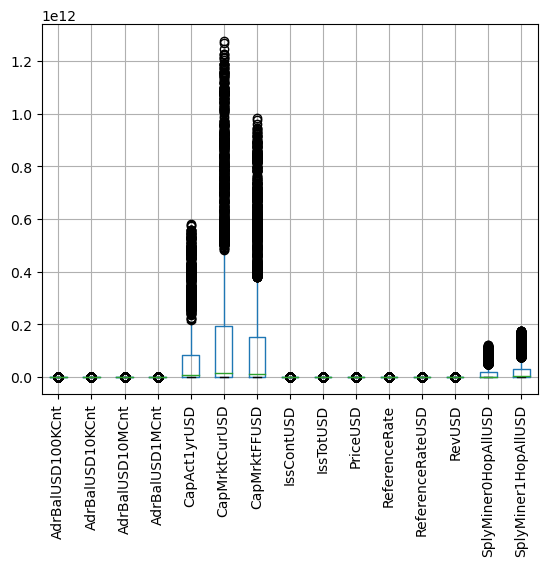

In [98]:
x.boxplot()
plt.xticks(rotation=90)
plt.show()

Para não correr o risco de overfitting, abaixo divido os dados em conjuntos de treino e conjuntos de teste.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [109]:
model = LinearRegression()
model.fit(X_train.values, y_train.values) #treina o modelo
y_train_pred=model.predict(X_train.values) #predição no conjunto de treino
y_test_pred=model.predict(X_test.values) #predição no conjunto de teste

In [110]:
# métrica R²
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test=r2_score(y_test, y_test_pred)

In [111]:
print(f'R² para o conjunto de treino: {r_squared_train}')
print(f'R² para o conjunto de teste: {r_squared_test}')

R² para o conjunto de treino: 0.9981634385010777
R² para o conjunto de teste: 0.998035445332804


In [112]:
prediction=model.predict(entrada_final.values.reshape(1,-1))
print(f'O preço em dolares do Bitcoin no próximo dia será: {prediction[0][0]}')

O preço em dolares do Bitcoin no próximo dia será: 27683.304191318326
